# Problem Statement:

Ames, IA has seen an increase in population of younger residents. According to the US Census, over 40% of it's residents are between the ages of 18-24 years. While this is a good thing for the city itself, as a population that young can contribute to the work force, buy homes, pay taxes and more; it has it's elderly population feeling left out.

The same Census also puts the elderly population of residents 65 or older in Ames at 8%. With more younger residents coming in and growing, the standard of living is bound to keep increasing. As they grow older in age, they feel marginalized and want to know what options they have.

Most have been considering leaving the state. Take John and Carrie Preston for instance. They've been residents for over 25 years but with the rapid changes, they feel it might be time to relocate to Florida simply because of the access to beaches, abundance of assisted living homes and close family in the area.

They've called upon us here at Datascience-R-US to give them an idea of how much their home is currently worth. They've invited a few friends as well who are interested in relocating so we will be speaking at the local Elks Club to a few of them.

In this project, we will attempt to give them a prediction of the price of houses in the Ames,Iowa area and what features contribute the most value to the price of a home. This way, they can make an informed decision on which features they can update in their home in order to capitalize off of the market.

GOALS: In this notebook, I am taking you through my steps of how I use the Ames housing data set to predict the price of homes in the Iowa area.

We will be exploring a few models in order to reach our goal of predicting price.

We will be looking at: -Linear Regression Models -Lasso Models -Ridge Models

After evaluating these three models, we will compare these models to our baseline score and select which model works the best in acheving our goal.

## GOALS:
In this notebook, I am taking you through my steps of how I use the Ames housing data set to predict the price of homes in the Iowa area. 

We will me exploring a few models in order to reach our goal of this prediction.

We will be looking at:
-Linear Regression Models
-Lasso Models 
-Ridge Models

After evaluating these three models, we will compare these models to our baseline score and select which model works the best in acheving our goal.

**Let's dive in!**

## Step 1: Import all libraries and Data

In [1]:
#imports for all imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import datetime as dt


#options

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
train_data = pd.read_csv('./datasets/train.csv')
train_data.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [3]:
train_data.shape

(2051, 81)

In [4]:
#train_data.info()

In [5]:
train_data.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [6]:
train_data['Lot Frontage'].sort_values(ascending = False).head()

960     313.0
1335    313.0
1875    200.0
441     195.0
1263    174.0
Name: Lot Frontage, dtype: float64

## Step 2: Cleaning and EDA

Here we will be cleaning our training data set and then transforming our testing data. I've decided to keep most of my data that I found valuable and fill in the 'NAN' rows with values such as 'NA' or 0. Because while these values are null, it's still data that tells us something. I feel that it's more important to keep as much data as possible at this point and then narrow down as we figure out which variables affect our target. Let's investigate!

In [7]:
#changing year and month to date time
train_data.rename(columns = {'Yr Sold': 'year', 'Mo Sold': 'month'}, inplace = True)

In [8]:
train_data['date'] = pd.to_datetime(train_data[['year', 'month']].assign(DAY=1))
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,month,year,Sale Type,SalePrice,date
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,2010-03-01
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,2009-04-01
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,2010-01-01
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,2010-04-01
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,2010-03-01


In [9]:
train_data.drop(columns = ['PID', 'Garage Yr Blt','Pool QC', 'Fireplace Qu', 'Exterior 2nd'], axis = 1, inplace = True)
#I'm making an assumption that if null values are high, they need to be dropped or filled

In [10]:
train_data.fillna({'Fence': 'na', 'Misc Feature': 'na', 'Alley': 'na', 'Garage Type': 'na', 'Garage Qual': 'na', 'Garage Cond':'na', 'Lot Frontage': 0}, inplace = True)

In [11]:
train_data.isnull().sum()

Id                   0
MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF 

In [12]:
train_data.dropna(inplace = True)

In [13]:
train_data.shape

(1866, 77)

## Let's get some descriptive stats about the home prices in the area

In [14]:
train_data['SalePrice'].round().mean() #price of average home in Ames IA

187003.3869239014

In [15]:
train_data['SalePrice'].median() #most popular price in Ames IA

167850.0

### Checking for outliers in our data

We'll use a box plot here to see if we have any outliers in our Sale Price Column

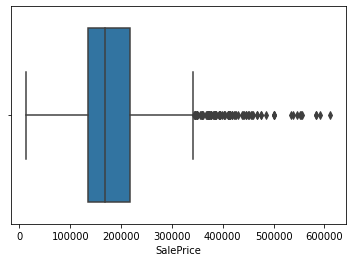

In [16]:
sns.boxplot(train_data.SalePrice); #Seems like we have a few values that are outside of our data range. Seems like they are extremely huge houses

**Seems like we have a few values that are outside of our data range.** 

**They seem to be huge houses but I don't feel that this will offset our data so I've decided to leave it in**

I'd like to see the correlation to of square ft to the price. Will plot all my sq ft columns to see 

I'd also like to see how the discrete variables stack up to price

In [17]:
#create date column
train_data.index = train_data['date']

In [18]:
train_data.index

DatetimeIndex(['2010-03-01', '2009-04-01', '2010-01-01', '2010-04-01',
               '2010-03-01', '2010-06-01', '2006-06-01', '2010-05-01',
               '2007-06-01', '2007-09-01',
               ...
               '2006-07-01', '2008-03-01', '2007-02-01', '2008-04-01',
               '2008-11-01', '2008-01-01', '2009-03-01', '2009-03-01',
               '2009-11-01', '2010-06-01'],
              dtype='datetime64[ns]', name='date', length=1866, freq=None)

Text(0.5, 1.0, 'Sales price of homes in Ames, IA from 2006-2010')

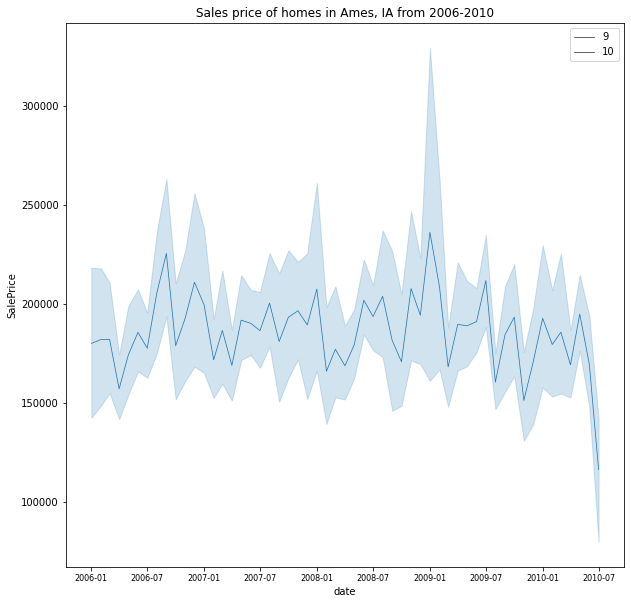

In [19]:
x = train_data.index
y = train_data['SalePrice']
plt.figure(figsize=(10,10))
sns.lineplot(x, y, size= 10)
plt.xticks(size =8)
plt.title('Sales price of homes in Ames, IA from 2006-2010')

Findings:
The graph is a little hard to read but it seems that overall, the price of homes in Ames, IA fluctuate between the 150k-250k mark showing that there are various markets in the Ames,IA area. There was also a sharp decline prices in January of 2008 which coincides with the great recession faced in the US at the time. The market did bounce back to historically high peaks in January 2009 in which it showcased high volatility. This was accompanied by a sharp decline about 5 months later.

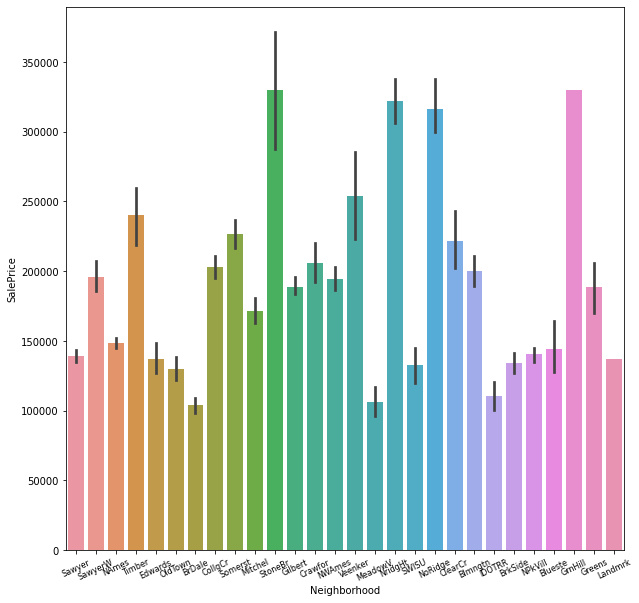

In [20]:
#Prices based on Neighborhoods
plt.figure(figsize=(10,10))
sns.barplot(x = 'Neighborhood', y= 'SalePrice', data = train_data)
plt.xticks(size = 8, rotation = 25);

## Findings:

**Neighborhoods**

- As far as pricing goes, the most expensive neighboorhoods is  Stone Br. A few other follow closely which are NridgHt, NoRidge and Grnhill. This means that the vlaues of homes in this area are worth more than other areas. Further analysis is required to see why these homes are values higher in these neighborhoods.

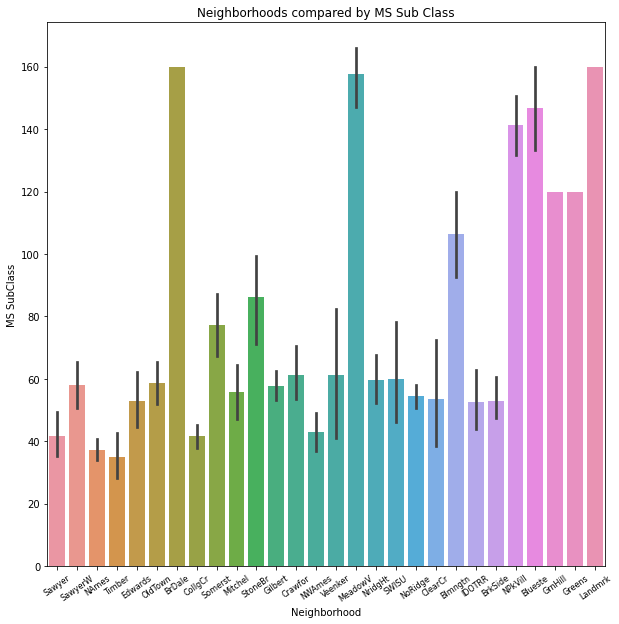

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Neighborhood', y= 'MS SubClass', data = train_data)
plt.xticks(size = 8, rotation = 35)
plt.title('Neighborhoods compared by MS Sub Class');

## Findings:
Homes in the Br Dale, MeadowV, and Landmark neighborhoods tend to be PUD's(Planned Unit Development) 
This means that these homes share common properties that everyone who lives in this type of community has access to. These neighborhoods can be classified as condominum or commercial type areas even if the home does look like a single family home. GrnHill and Greens neighborhoods are also classified as PUD's. The difference being that they are one story buildings as compared to the first 3 neighborhoods mentioned. 

Good to note that if a client is requesting to live in a "shared ammenities" space, these opitions would probably be of great interest to them.

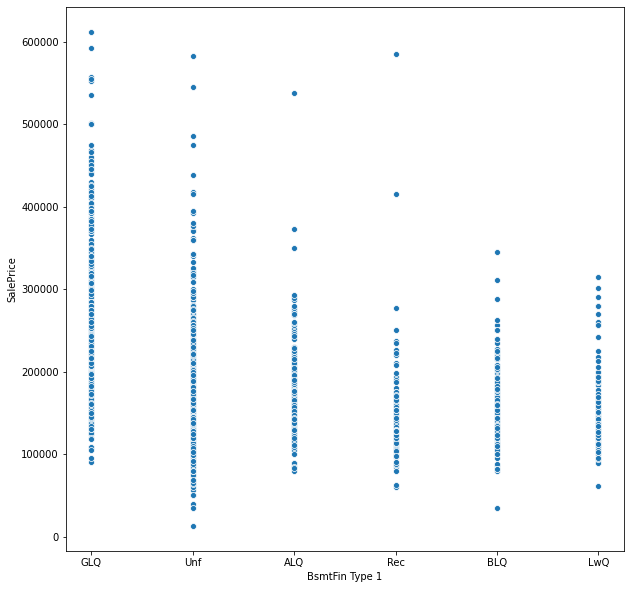

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(x ='BsmtFin Type 1', y = 'SalePrice', data = train_data);

## Basement condition:
While not super detailed, it seems that keeping the basement in good condition (GLQ) will garner the highest price of all categories.

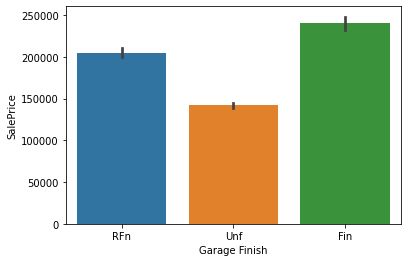

In [23]:
sns.barplot(x ='Garage Finish', y = 'SalePrice', data = train_data);

## Garage Finishing:
- A garage interior finish is also worth more in the Ames, IA area. On average, homes with an interior finished garage garner a sales price of almost $250,000.

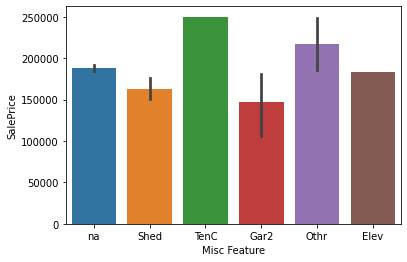

In [24]:
sns.barplot(x = 'Misc Feature', y = 'SalePrice', data = train_data);

## Misc Feature
- Tennis court seems to garner the highest price. It's also worth noting that homes without any Miscellaneous features still perform better than homes with shed, elevator and 2nd garage categories. This will be good news for homeowners who do not possess such features


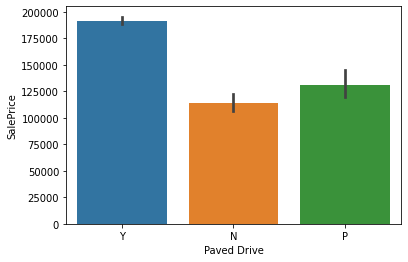

In [25]:
sns.barplot(x = 'Paved Drive', y = 'SalePrice', data = train_data);

## Paved Driveway:

- A home with a paved driveway on average, is worth over 25% more than a partial driveway. We can advice clients to pave their driveways as it increases the likelihood of a higher Sale Price.

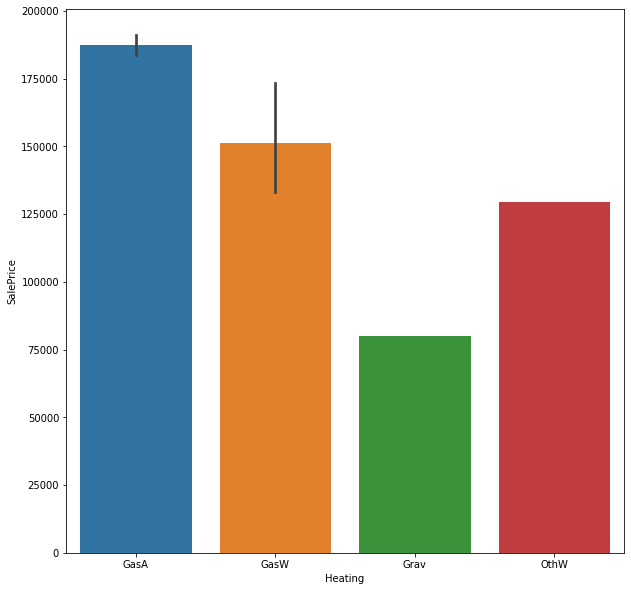

In [26]:
#heating systems
plt.figure(figsize=(10,10))
sns.barplot(x = 'Heating', y= 'SalePrice', data = train_data);

## Heating Systems:
- As far as heating systems go, residents in Ames, IA tend to value 'Gas forced Warm Air' Furnance over the other types of heating sytems as the prices show.  

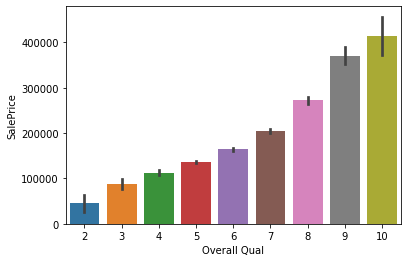

In [27]:
sns.barplot(x= 'Overall Qual', y= 'SalePrice', data = train_data);

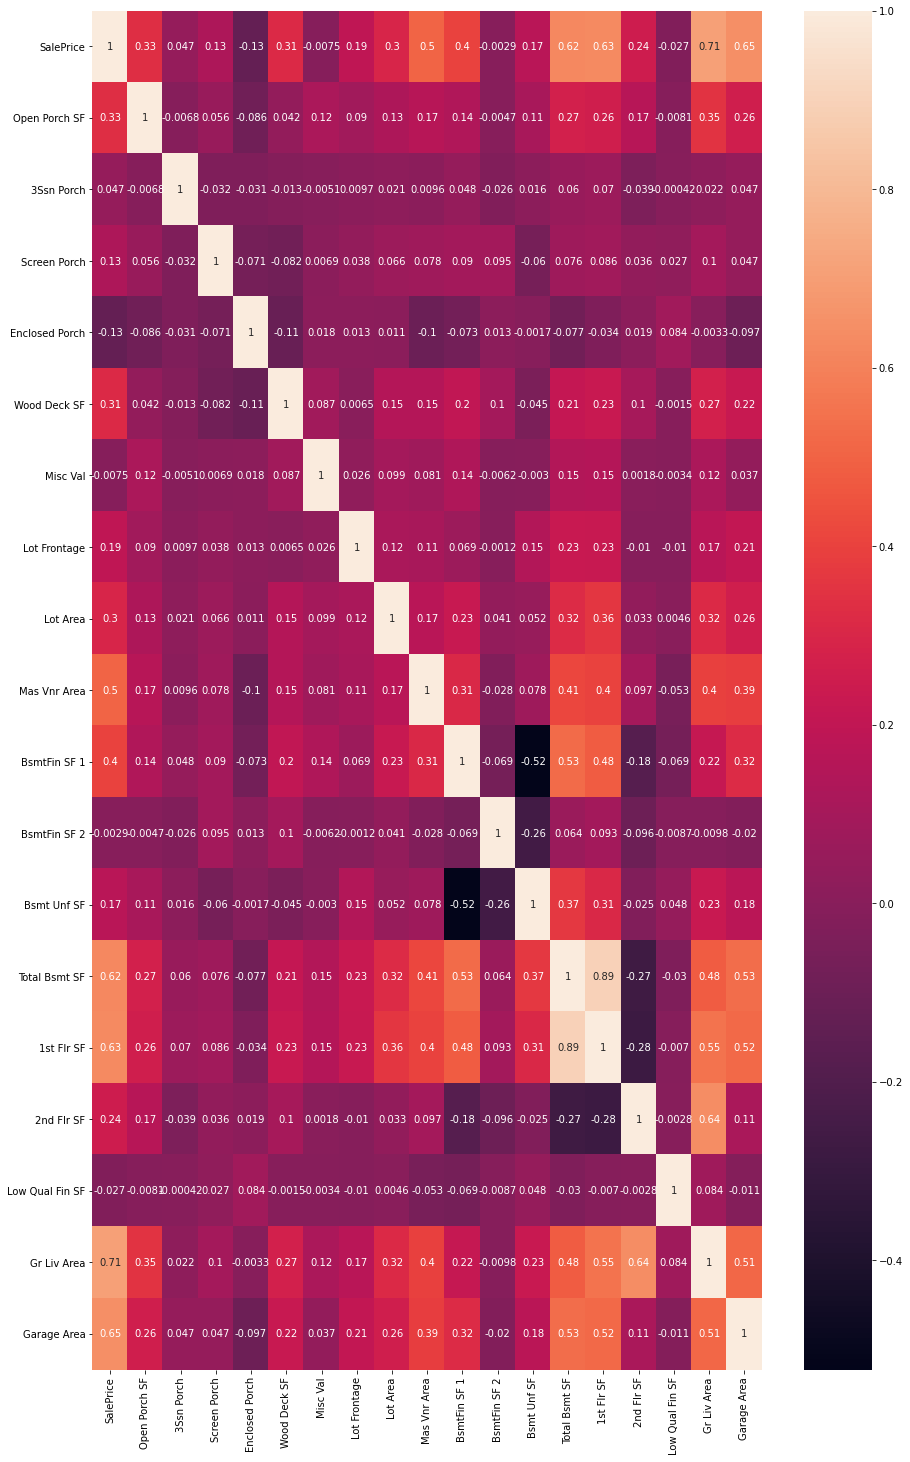

In [28]:
#heatmap of all continous variables
plt.figure(figsize=(15,25))
sns.heatmap(train_data[['SalePrice', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Enclosed Porch', 'Wood Deck SF', 'Misc Val', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area',
                        'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area']].corr(), annot=True);

## Findings:
- Gross living area is most closely correlated to price according to our heatmap. Garage Area is a close 2nd. While most homeowners can't increase their gross living area without shelling out a pretty penny, increasing the garage area might be the next best option.

## Step 3: Feature Engineering

## Let's get some dummies !
While this initial round looks decent, We still need to convert our categorical data in order to feed it into our models. We need to see how  our X coef [Features] affects our [Target], Saleprice.
In order to do this. I will be creating dummy columns for a lot of our variables. 

In [29]:
train_data = pd.get_dummies(data = train_data, columns = [ 
                                                        'House Style', 'Bsmt Exposure', 
                                                        'Garage Cond','Street', 'Lot Config', 
                                                        'Neighborhood', 'Condition 1', 'Bldg Type', 'Roof Style', 
                                                        'Exter Cond', 'Foundation', 'Bsmt Qual','Bsmt Cond', 
                                                        'Kitchen Qual', 'Functional', 'Garage Type', 'Paved Drive',
                                                        'Fence','Sale Type', 'Exter Qual', 'Garage Finish', 'Garage Qual',
                                                        'Alley','Land Slope','Mas Vnr Type'])

In [30]:
train_data.shape

(1866, 200)

# Step 4:  Modeling process

In [31]:
train_data.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Matl,Exterior 1st,Mas Vnr Area,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,month,year,SalePrice,date,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Street_Grvl,Street_Pave,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_na,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Alley_Grvl,Alley_Pave,Alley_na,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-01,109,60,RL,0.0,13517,IR1,Lvl,AllPub,Norm,6,8,1976,2005,CompShg,HdBoard,289.0,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,0,44,0,0,0,0,na,0,3,2010,130500,2010-03-01,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0
2009-04-01,544,60,RL,43.0,11492,IR1,Lvl,AllPub,Norm,7,5,1996,1997,CompShg,VinylSd,132.0,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,0,74,0,0,0,0,na,0,4,2009,220

In [32]:
train_data.drop(columns = ['MS Zoning', 'MS SubClass', "Electrical", "BsmtFin Type 1", "BsmtFin Type 2", 'Lot Shape', 'Condition 2', 'Heating', 'Street_Pave', 'Utilities',
                          'Roof Matl', 'Central Air', 'Misc Feature', 'Exterior 1st', 'Land Contour', 'Heating QC'], inplace= True)

# Instantiate!
Now before we move any further, Now that we have dummified our columns. Let's see how this new data affects our target variable. Which is... Sale Price!.

I'll be using a few regression models here to get the best predictions of homes in the Ames, IA area. Let's get started with Linear Regression.

In [33]:
#creating X and Y variables
Features = train_data.drop(['SalePrice','date', 'month', 'Id'], axis= 1)
X = Features
y = train_data ['SalePrice']
sc = StandardScaler()

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
# instantiate Linear Regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#finding mean of our predicted values and true values
y_hat = lr.predict(X)
print(y_hat.mean())
print(y.mean())

8.582497419807957e+18
187003.3869239014


In [59]:
# calculating residuals
resids = y - y_hat
resids[:2]

date
2010-03-01   -7.482381e+18
2009-04-01   -1.087588e+19
Name: SalePrice, dtype: float64

In [38]:
print(lr.intercept_) 
print(lr.coef_[0])

185151.98072708797
920.0986484051955


In [39]:
#checking errors to see how off values are
print('MAE:', metrics.mean_absolute_error(y, y_hat))
print('MSE:', metrics.mean_squared_error(y, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_hat)))

MAE: 8.582497419807771e+18
MSE: 8.647147638416004e+37
RMSE: 9.299004053346791e+18


In [40]:
#create coefficents dataframe
coefs = pd.DataFrame({'column':X.columns, 'coef': lr.coef_}) 
coefs.tail(20)

,column,coef
160,Exter Qual_Gd,-9.703233e+16
161,Exter Qual_TA,-9.983277e+16
162,Garage Finish_Fin,3.649463e+16
163,Garage Finish_RFn,3.762037e+16
164,Garage Finish_Unf,4.107570e+16
165,Garage Qual_Ex,2.137440e+15
166,Garage Qual_Fa,-2.116565e+16
167,Garage Qual_Gd,-1.153426e+16
168,Garage Qual_Po,2.385540e+16
169,Garage Qual_TA,-2.421533e+16


In [41]:
#inital train and test scores
print (lr.score(X_train, y_train))
print (lr.score(X_test,y_test))

0.9267690400668708
-2.8725616101134052e+23


In [42]:
# Features = test_data[['Gr Liv Area', 'Overall Cond', 'Full Bath', 'Half Bath', 'Year Built', 'Bedroom AbvGr', 'Year Remod/Add', 'Kitchen AbvGr', 'Total Bsmt SF', 'Fireplaces', 'Garage Cars', '1st Flr SF', '2nd Flr SF']]
# X_ = Features

In [43]:
# y_pred= lr.predict(X_)
# y_pred

In [44]:
# test_data['SalePrice'] = y_pred
# test_data['SalePrice']

In [45]:
# Kaggle_sub = test_data[['Id','SalePrice']]

In [46]:
# Kaggle_sub.to_csv('../datasets/Kaggle_sub.csv', index = False)

## Let's do a Lasso Regression!

In [47]:
model = Lasso(alpha = .1)

In [48]:
model.fit(X_train, y_train)

/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40104819423.73889, tolerance: 776943052.9372201
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
model.score(X_train, y_train)

0.9267890169756331

In [50]:
model.score(X_test, y_test)

0.7809763388156598

In [51]:
coefs_1 = pd.DataFrame({'column':X.columns, 'coef': model.coef_})
#relationship between our coefficients and target. 
#These represent the dollar value in price for every increase or decrease we have in each of these coefficents


In [60]:
#find highest negative coefficients

coefs_1.head()

,column,coef
0,Lot Frontage,820.677873
1,Lot Area,6025.218107
2,Overall Qual,10031.926270
3,Overall Cond,5981.159972
4,Year Built,9736.224323


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
# works mainly for continous data
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
VIF = calc_vif(X)


/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [55]:
# #finisng correlation between independent variables
# corr = train_data.corr()
# c1 = corr.abs().unstack()
# c1.sort_values(ascending = False)


In [61]:
VIF.iloc[0:5]

,variables,VIF
0,Lot Frontage,1.491861
1,Lot Area,2.232075
2,Overall Qual,4.781311
3,Overall Cond,2.222224
4,Year Built,12.942295


In [57]:
#getting OLS regression results to see which features are statistically significant by evaluating their p-value
results = sm.OLS(y_test,X_test).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.143
Model:                            OLS   Adj. R-squared (uncentered):             -0.156
Method:                 Least Squares   F-statistic:                             0.4779
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                        1.00
Time:                        10:20:24   Log-Likelihood:                         -7609.1
No. Observations:                 560   AIC:                                  1.551e+04
Df Residuals:                     415   BIC:                                  1.614e+04
Df Model:                         145                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1504.3061   1.31e+04     -0.115      0.909   -2.73e+04    2.43e+04
x2           -72.3737   1.58e+04     -0.005      0.996   -3.12e+04     3.1e+04
x3          9527.9476   2.31e+04      0.413      0.680   -3.58e+04    5.49e+04
x4          7090.5856    1.6e+04      0.443      0.658   -2.43e+04    3.85e+04
x5          5214.8985   4.07e+04      0.128      0.898   -7.47e+04    8.52e+04
x6          2076.9187   2.15e+04      0.097      0.923   -4.02e+04    4.43e+04
x7          2477.5849   1.81e+04      0.137      0.891   -3.32e+04    3.81e+04
x8         -3649.9062   1.45e+04     -0.251      0.802   -3.22e+04    2.49e+04
x9          1958.9556   1.19e+04      0.164      0.870   -2.15e+04    2.54e+04
x10        -2917.3656    1.4e+04     -0.209      0.835   -3.04e+04    2.45e+04
x11        -6222.5592   2.41e+04     -0.258      0.796   -5.36e+04    4.12e+04
x12          1.37e+04   3.11e+04      0.441      0.660   -4.74e+04    7.48e+04
x13         1.118e+04   2.64e+04      0.423      0.672   -4.07e+04    6.31e+04
x14        -1537.6085   1.76e+04     -0.087      0.930   -3.61e+04    3.31e+04
x15          1.91e+04   2.09e+04      0.916      0.360   -2.19e+04    6.01e+04
x16         6399.9465   1.64e+04      0.391      0.696   -2.58e+04    3.86e+04
x17          492.1506    1.3e+04      0.038      0.970   -2.51e+04    2.61e+04
x18         5882.9722   2.06e+04      0.286      0.775   -3.45e+04    4.63e+04
x19         3332.0377   1.79e+04      0.187      0.852   -3.18e+04    3.84e+04
x20        -1904.0450    1.9e+04     -0.100      0.920   -3.93e+04    3.55e+04
x21        -3558.1858   2.35e+04     -0.151      0.880   -4.98e+04    4.27e+04
x22          930.1393   2.43e+04      0.038      0.969   -4.67e+04    4.86e+04
x23         1472.1665    1.4e+04      0.105      0.916   -2.61e+04     2.9e+04
x24         1.621e+04   2.72e+04      0.595      0.552   -3.73e+04    6.97e+04
x25        -7251.4141   2.77e+04     -0.262      0.794   -6.17e+04    4.72e+04
x26         3621.5778   1.29e+04      0.280      0.779   -2.18e+04     2.9e+04
x27         -905.7961   1.36e+04     -0.067      0.947   -2.76e+04    2.58e+04
x28         -806.4939   1.24e+04     -0.065      0.948   -2.53e+04    2.37e+04
x29        -1133.0704   1.32e+04     -0.086      0.932   -2.71e+04    2.48e+04
x30         2917.1416    1.2e+04      0.242      0.809   -2.07e+04    2.66e+04
x31        -5919.5849   1.15e+04     -0.514      0.607   -2.85e+04    1.67e+04
x32         1276.2462   1.04e+04      0.122      0.903   -1.92e+04    2.18e+04
x33         -752.6387   1.13e+04     -0.067      0.947    -2.3e+04    2.15e+04
x34          843.2983   1.27e+04      0.066      0.947   -2.41e+04    2.58e+04
x35           38.9619   1.09e+04      0.004      0.997   -2.1

In [58]:
train_data.drop(columns = ['Kitchen AbvGr', 'MS Zoning_C (all)', 'Condition 2_RRAe', 'Neighborhood_Landmrk', 'Roof Style_Mansard', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShngl','Functional_Sev', 'Misc Feature_Elev',
                          'Sale Type_ConLI', 'Exterior 1st_BrkComm', 'Exterior 1st_Stone', 'Land Slope_Sev'], inplace=True)

KeyError: "['MS Zoning_C (all)' 'Condition 2_RRAe' 'Roof Matl_Tar&Grv'\n 'Roof Matl_WdShngl' 'Misc Feature_Elev' 'Exterior 1st_BrkComm'\n 'Exterior 1st_Stone'] not found in axis"

### Now let's try a Ridge Model

In [ ]:
# Instantiate.
ridge_model = Ridge(alpha=0.1)

# Fit.
ridge_model.fit(X_train, y_train)

# print R2 scores
print(f'The ridge train score is: {ridge_model.score(X_train, y_train)}')
print(f'The ridge test score is :{ridge_model.score(X_test, y_test)}')

In [ ]:
ridge = pd.DataFrame({'column':X.columns, 'coef': ridge_model.coef_}) 
ridge.loc[ridge['coef'] == 0]

In [ ]:
pred = ridge_model.predict(X)

In [ ]:
residuals = y - pred
residuals.mean()  #difference in true Sales price vs predicted sales price

In [ ]:
metrics.r2_score(y, pred) #this would be how much my predictions are off by

# Step 5:  Overall Findings:

So all three models seemed to score between a range of 90-93% between the training and testing data. I did notice that my linear and lasso models made it difficult to see which variables are strongly correlated with price

However with my Ridge Model, I can clearly see which variable is affecting price and can give recommendations as well! So Ridge is the model we will stick with.

# Step 6: Recommendations!

So after our findings we can now recommed a few things that our elderly patients can do to increase the value of their home

In our EDA, square footage happened to be one of the biggest drivers of price. Looking at our Ridge model coefficients, we can see this proves to be true. 

Lot Area, Gross Living Area, 1st and 2nd floor and total basement square footage carry added average value of over **$10,000** in value. 

Now it's completely understandable if our clients would be reluctant to accept this recommendation because it's not an easy thing to just add additional square footage!

**So what other options do we have?**

***Improving Overall condition and quality and exterior quality***

-Keeping the overal condition and quality and exterior quality of your home can add value as well! Approximately, **$7,000** to be exact! So just keeping the house in overall good condition and the quality of material that is used in the house in good shape is key!

**Misc Features**

- Adding some miscellaneous features such as a Shed or a garage can add up up to $800 on average

**Garage**

- Add another car garage or adding some square footage to your current garage area can add a value between **$ 2000- $4000** 

**Paved Driveway** 

- Having a paved driveway can add up to $500 dollars in value as well

**Porch**

- A screen porch, which can be added towards the rear of your home, can add up to **$3000** in value!

**Fence Minimum Privacy**

- Adding just a little fence privacy can increase the value  

**Kitchen quality** 

-Kepping your kitchen in 'Excellent' shape also carries about a **$5000** increase in value of your home

**Roof Matl_CompShg**

- Compound shingle roofs adds an additional $2095 in value

**Neighborhoods**

- StoneBr, Nridght, NoRidge, Somertst are among some of the neighborhoods have the highest value. So if you're home falls within those areas, an additional $2-3k in value can be added to your home.  


# Summary:

- While these models do provide a baseline as to understanding the Ames, IA real estate market, we cannot accurately use these models as effectively to predict price.

- As seen from our R2 results, the model was very much off on the prices it predicted. 

- This is simply because there's just information that we do not know that hasn't been included in our data. Or we may have too much data even though our Lasso, Linear and Ridge models all performed well on the test data. This was an important lesson in realizing that the scores of the model is not always the best predictor. We should focus more on the RMSE or MSE in this case. 

- As a final word of advice, we highly recommend working with local and knowledgeable Realtors in the area. Our model was a good start in obtaining value of certain features in a home, but it is not the end be all solution.

Thank you!

